<img src="slide2.png"/>

<img src="slide1.png"/>

<img src="geoms.png"/>

There is qplot and ggplot
----

- Think of qplot() as a Quick Plot.

- Think of ggplot() as a much more Complex Plot.

How to load ggplot2 and dataset?
--

In [4]:
##some re-scaling of plots for my notebook - non-important for now
library(repr)
options(repr.plot.width=4, repr.plot.height=4)

##loading ggplot2 package
library(ggplot2)

In [5]:
#lets choose the dataset we are going to work on
library(MASS)

#Structure of the dataset UScereal
str(UScereal)

'data.frame':	65 obs. of  11 variables:
 $ mfr      : Factor w/ 6 levels "G","K","N","P",..: 3 2 2 1 2 1 6 4 5 1 ...
 $ calories : num  212 212 100 147 110 ...
 $ protein  : num  12.12 12.12 8 2.67 2 ...
 $ fat      : num  3.03 3.03 0 2.67 0 ...
 $ sodium   : num  394 788 280 240 125 ...
 $ fibre    : num  30.3 27.3 28 2 1 ...
 $ carbo    : num  15.2 21.2 16 14 11 ...
 $ sugars   : num  18.2 15.2 0 13.3 14 ...
 $ shelf    : int  3 3 3 1 2 3 1 3 2 1 ...
 $ potassium: num  848.5 969.7 660 93.3 30 ...
 $ vitamins : Factor w/ 3 levels "100%","enriched",..: 2 2 2 2 2 2 2 2 2 2 ...



You can always type: help(UScereal)


In [151]:
#some lines
head(UScereal)

,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins
100% Bran,N,212.1212,12.121212,3.030303,393.9394,30.303030,15.15152,18.18182,3,848.48485,enriched
All-Bran,K,212.1212,12.121212,3.030303,787.8788,27.272727,21.21212,15.15151,3,969.69697,enriched
All-Bran with Extra Fiber,K,100.0000,8.000000,0.000000,280.0000,28.000000,16.00000,0.00000,3,660.00000,enriched
Apple Cinnamon Cheerios,G,146.6667,2.666667,2.666667,240.0000,2.000000,14.00000,13.33333,1,93.33333,enriched
Apple Jacks,K,110.0000,2.000000,0.000000,125.0000,1.000000,11.00000,14.00000,2,30.00000,enriched
Basic 4,G,173.3333,4.000000,2.666667,280.0000,2.666667,24.00000,10.66667,3,133.33333,enriched


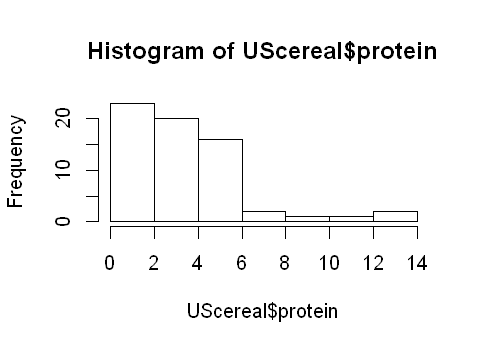

In [6]:
options(repr.plot.width=4, repr.plot.height=2.91)

##Basic Histogram without ggplot2
hist(UScereal$protein)

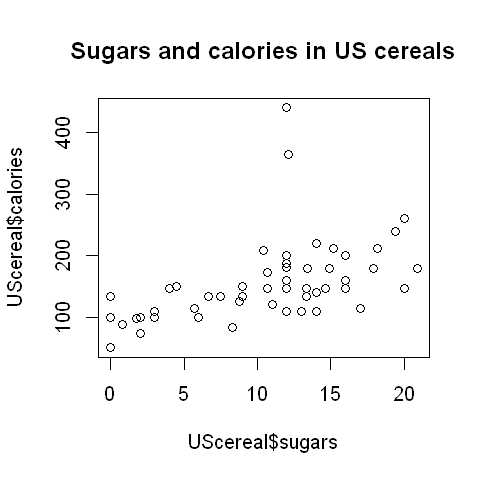

In [7]:
options(repr.plot.width=4, repr.plot.height=4)

plot(UScereal$sugars, UScereal$calories)
title("Sugars and calories in US cereals")
points(sugars ~ calories, col="red", data=UScereal)

EXERCÍCIO: À semelhança do histograma acima, construir um histograma que apresente a contagem de proteínas.

THE ggplot!!
---------------------

In [8]:
g <- ggplot(UScereal, aes(sugars, calories))

This means that x is "sugars" and y is "calories".

"sugars" and "calories" are column names of the Dataframe UScereal.

SCATTER PLOTS
--

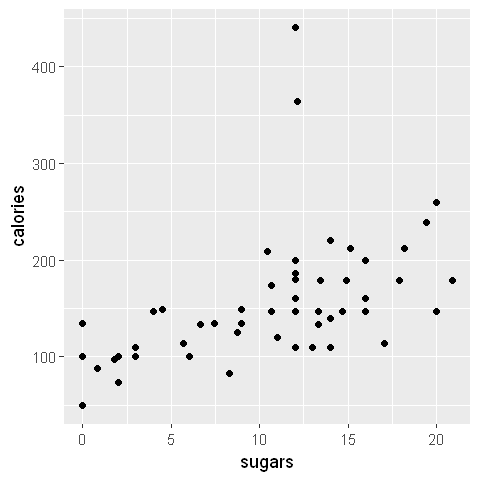

In [9]:
g + geom_point()

Let's practice modifying aesthetics now.

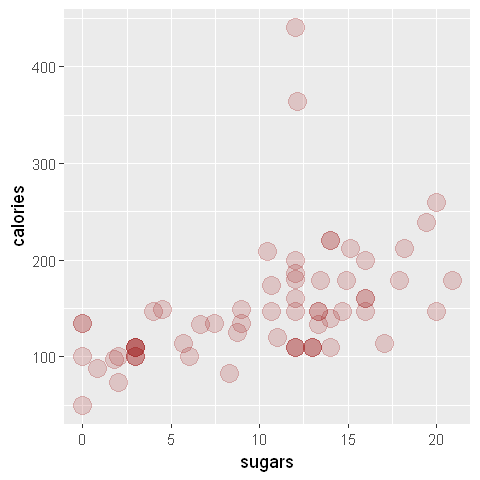

In [10]:
g + geom_point(aes(color = I("brown")), size=5, alpha = I(1/5))

To make a semi-transparent colour you can use the alpha aesthetic, which takes a value between 0 (completely transparent) and 1 (complete opaque). 

It's often useful to specify the transparency as a fraction, e.g., 1/10 or 1/20, as the denominator specifies the number of points that must overplot to get a completely opaque colour.

We can see that some circles are more transparent than others, 
because they correspond to a higher frquency.

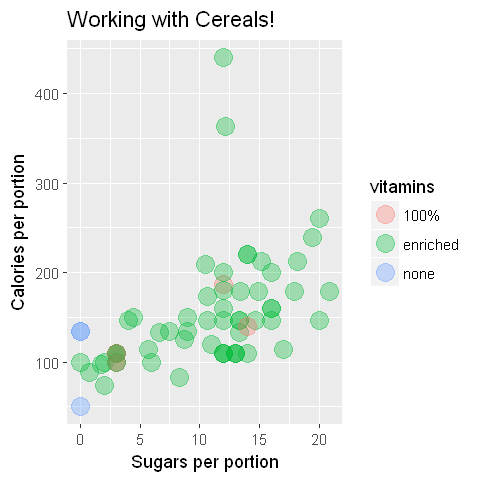

In [11]:
g + geom_point(size=5, alpha = I(1/3), aes(color = vitamins)) + 
    labs(title = "Working with Cereals!", x = "Sugars per portion", y= "Calories per portion")

EXERCÍCIO:
- Utilizar o dataset "airquality" que vem com o R
- Fazer um scatter plot com Ozone vs. Day
- Deixar a cor ser Wind
- Introduzir alguma transparência
- Definir um tamanho para os pontos
- Dar um título ao gráfico e dar nomes aos eixos

In [12]:
g <- ggplot(airquality, aes(Ozone, Day))


Warning message:
"Removed 37 rows containing missing values (geom_point)."

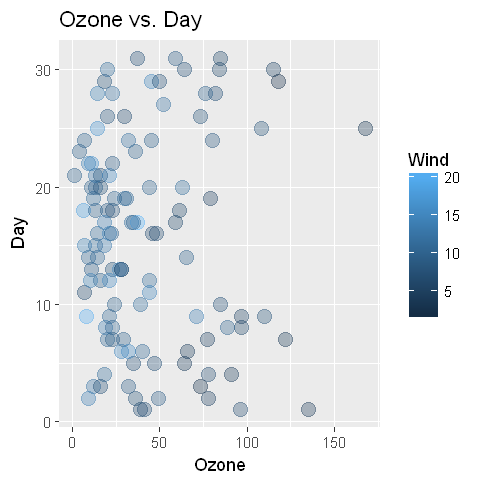

In [13]:
g + geom_point(size=4, alpha=I(1/3), aes(color=Wind)) + labs(title="Ozone vs. Day", xlab="Ozono", ylab="Dia da semana")

geom_smooth
--

geom_smooth fits a smooth curve between two variables.

Method LOESS: LOcally WEighted Scatter-plot Smoother (known as locally weighted polynomial regression)
or
Method LM: Linear Model

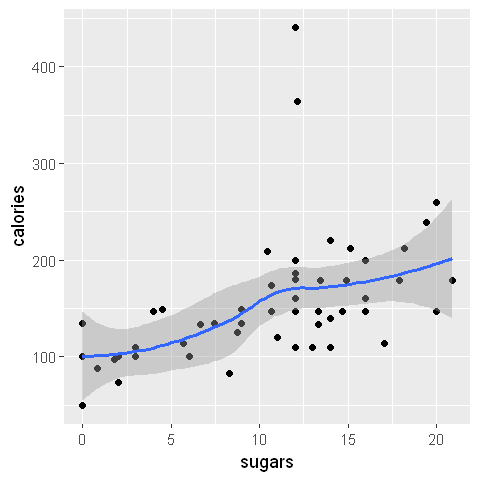

In [14]:
g <- ggplot(UScereal, aes(sugars, calories))
g + geom_point() + geom_smooth(method="loess")

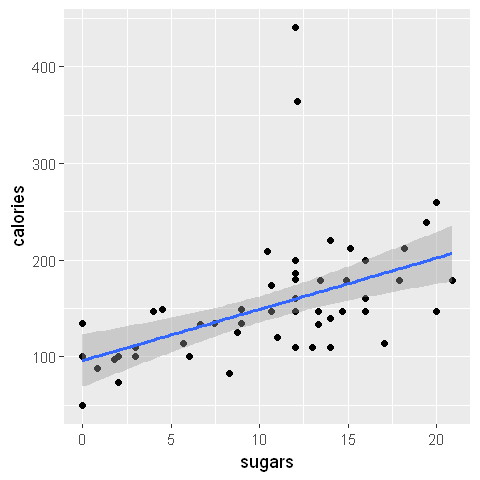

In [15]:
g + geom_point() + geom_smooth(method = "lm")

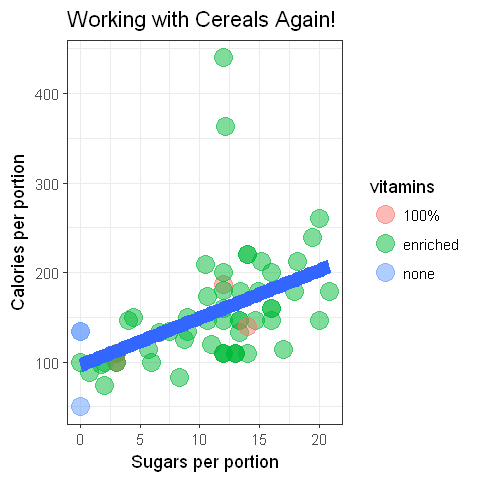

In [16]:
g + geom_point(size=5, alpha = 1/2, aes(color = vitamins)) + 
    labs(title = "Working with Cereals Again!", x = "Sugars per portion", y= "Calories per portion") + 
    geom_smooth(size=4, linetype=1, method="lm", se=FALSE) + theme_bw()

EXERCÍCIO: Experimentar construir o gráfico acima mas brincando com o tipo de linha e tamanho. Tentar que a linha seja a tracejado e mais fina.

Boxplots
--

In [17]:
g <- ggplot(UScereal, aes(x=mfr, y=calories))
### G=General Mills, K=Kelloggs, N=Nabisco, P=Post, Q=Quaker Oats, R=Ralston Purina.

Warning message:
"Removed 5 rows containing non-finite values (stat_boxplot)."

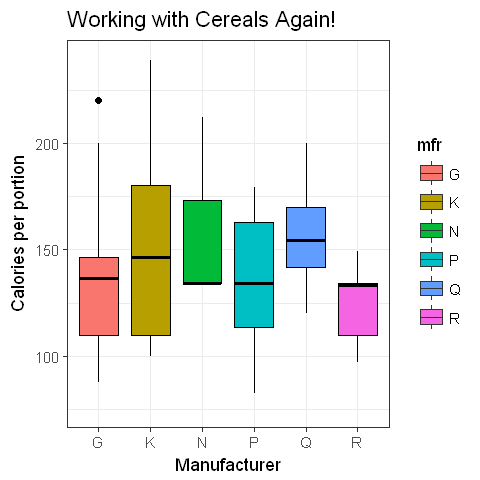

In [18]:
g + geom_boxplot(aes(fill=mfr, color=I("black"))) + 
    ylim(75, 240) +
    labs(title = "Working with Cereals Again!", x = "Manufacturer", y= "Calories per portion") + 
    theme_bw()

In a box plot we can see the change in the median and adjacent quartiles.

Histogram and density plots
--

Histogram and density plots show the distribution of a single variable. 

The following code shows the distribution of calories:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


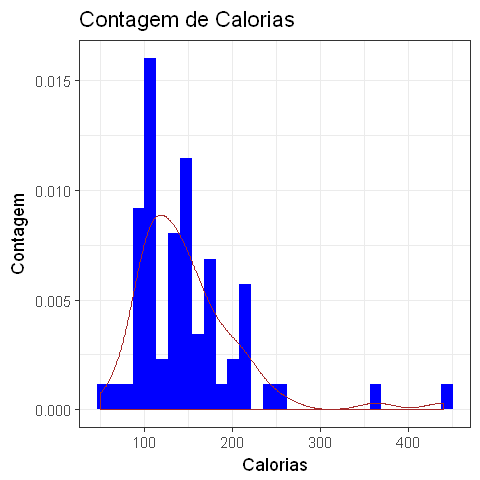

In [19]:
g <- ggplot(UScereal, aes(calories))
g + geom_histogram(aes(y=..density.., fill=I("blue"))) + 
    geom_density(aes(color=I("brown"))) + 
    labs(title="Contagem de Calorias", x="Calorias", y="Contagem") + 
    theme_bw()

WHAT IS THE BIN WIDTH?
--

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


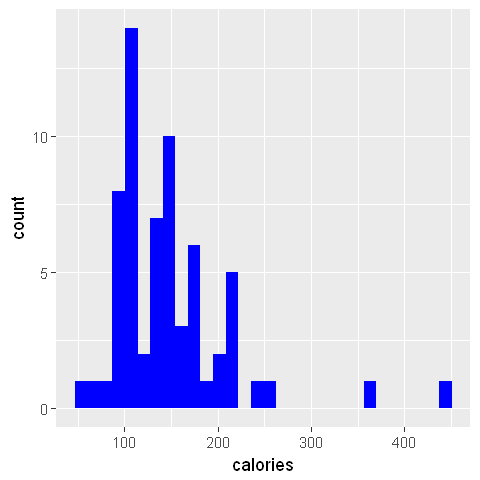

In [20]:
g <- ggplot(UScereal, aes(calories))
g + geom_histogram(aes(fill=I("blue")))

We get a message about the binwidth defaulting to 30.

When you make a histogram, you're essentially making a bar chart that shows how many data points fit within a certain range. That range is the bin width.

So in a histogram, data is grouped into "bins". 

To construct a histogram, the first step is to "bin" the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.

Lets try to calculate the bin width. 

We simply find the range (maximum - minimum) and divide that by how many bins we'd like to have. 

A rough guideline for the number of bins is: take the square root of the number of data values you have.

In [87]:
range_calories = max(UScereal$calories) - min(UScereal$calories)
range_calories

[1] 390

In [92]:
number_bins = sqrt(nrow(UScereal))
number_bins

[1] 8.062258

In [94]:
#SO:
correct_bin_width = range_calories/number_bins
correct_bin_width

[1] 48.37355

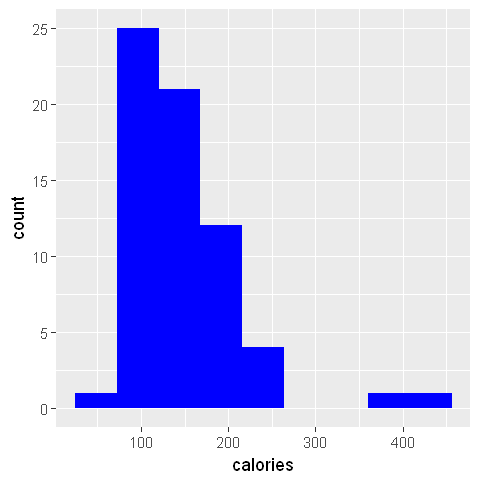

In [21]:
g + geom_histogram(binwidth = 48, aes(fill=I("blue")))

No more messages in red!!!

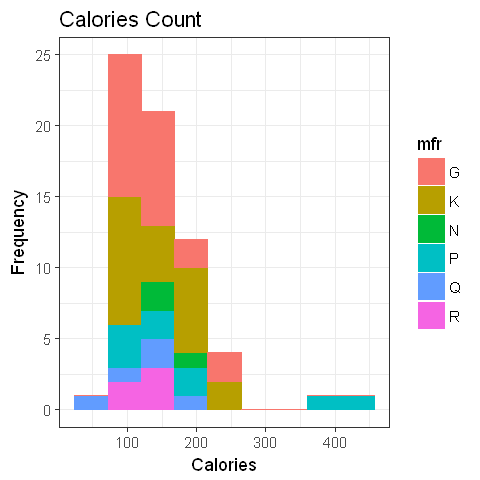

In [22]:
g + geom_histogram(binwidth = 48, aes(color=mfr, fill=mfr)) + 
    labs(title="Calories Count", x="Calories", y="Frequency") + 
    theme_bw()

Too complicated! Lets chack a boxplot of it.

Warning message:
"Removed 5 rows containing non-finite values (stat_boxplot)."

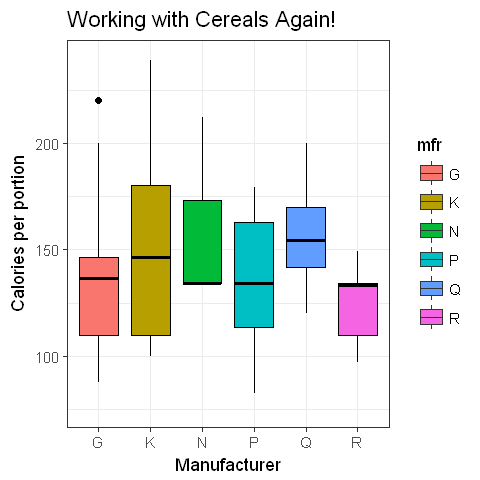

In [24]:
ggplot(UScereal, aes(x=mfr, y=calories)) + 
    geom_boxplot(aes(fill=mfr, color=I("black"))) + 
    ylim(75, 240) +
    labs(title = "Working with Cereals Again!", x = "Manufacturer", y= "Calories per portion") + 
    theme_bw()

Time series with line and path plots
--

Shows how a single variable change over time. 

Because there is no time variable in the UScereal data, we use the economics dataset which describes unemployment in a certain population over time.

In [25]:
str(economics)

Classes 'tbl_df', 'tbl' and 'data.frame':	574 obs. of  6 variables:
 $ date    : Date, format: "1967-07-01" "1967-08-01" ...
 $ pce     : num  507 510 516 513 518 ...
 $ pop     : int  198712 198911 199113 199311 199498 199657 199808 199920 200056 200208 ...
 $ psavert : num  12.5 12.5 11.7 12.5 12.5 12.1 11.7 12.2 11.6 12.2 ...
 $ uempmed : num  4.5 4.7 4.6 4.9 4.7 4.8 5.1 4.5 4.1 4.6 ...
 $ unemploy: int  2944 2945 2958 3143 3066 3018 2878 3001 2877 2709 ...


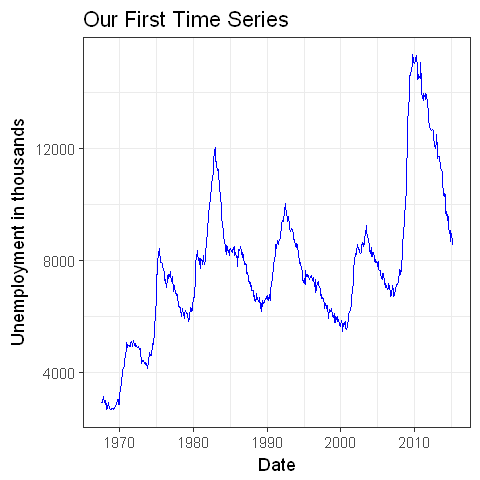

In [26]:
g <- ggplot(economics, aes(date, unemploy))
g + geom_line(aes(color=I("blue"))) + 
    labs(title="Our First Time Series", x="Date", y="Unemployment in thousands") +
    theme_bw()

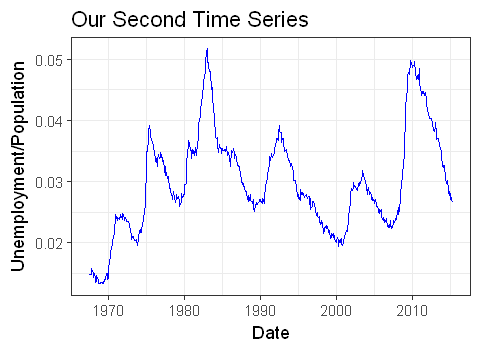

In [27]:
options(repr.plot.width=4, repr.plot.height=2.9)

g <- ggplot(economics, aes(date, unemploy/pop))
g + geom_line(aes(color=I("blue"))) + 
    labs(title="Our Second Time Series", x="Date", y="Unemployment/Population") + theme_bw()

Some other themes: Black and White Theme, Grey Theme and The FiveThirtyEight Theme

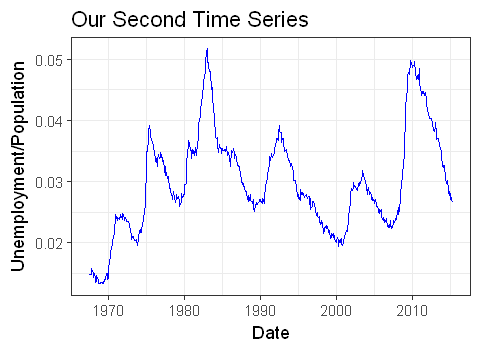

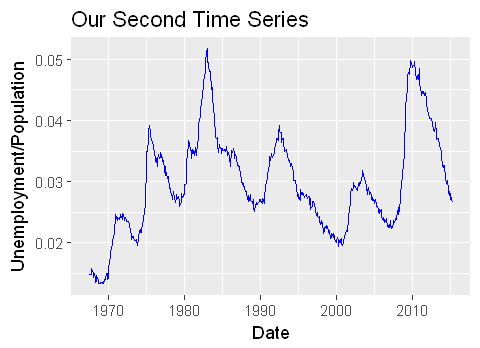

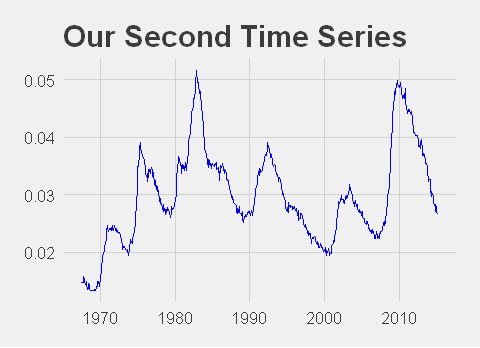

In [28]:
library(ggthemes)

options(repr.plot.width=4, repr.plot.height=2.9)

g <- ggplot(economics, aes(date, unemploy/pop))

g + geom_line(aes(color=I("blue"))) + 
    labs(title="Our Second Time Series", x="Date", y="Unemployment/Population") + theme_bw()

g + geom_line(aes(color=I("blue"))) + 
    labs(title="Our Second Time Series", x="Date", y="Unemployment/Population") + theme_grey()

g + geom_line(aes(color=I("blue"))) + 
    labs(title="Our Second Time Series", x="Date", y="Unemployment/Population") + theme_fivethirtyeight()

FACETING
--

We have already discussed using aesthetics (colour and shape) to compare subgroups, drawing all groups on the same plot.

Faceting takes an alternative approach: It creates tables of graphics by splitting the data into subsets and displaying the same graph for each subset in an arrangement that facilitates comparison.

The default faceting method in GGplot() creates plots arranged on a grid specified by a faceting formula which looks like row_var ~ col_var. 

You can specify as many row and column variables as you like, keeping in mind that using more than two variables will often produce a plot so large that it is difficult to see on screen. To facet on only one of columns or rows, use . as a place holder. 

For example, row_var ~ . will create a single column with multiple rows.


For faceting we will use a different dataset called Diamonds.

In [29]:
str(diamonds)

Classes 'tbl_df', 'tbl' and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


In [30]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


The following code illustrates this technique with a histogram showing the distribution of carats conditional on color. 

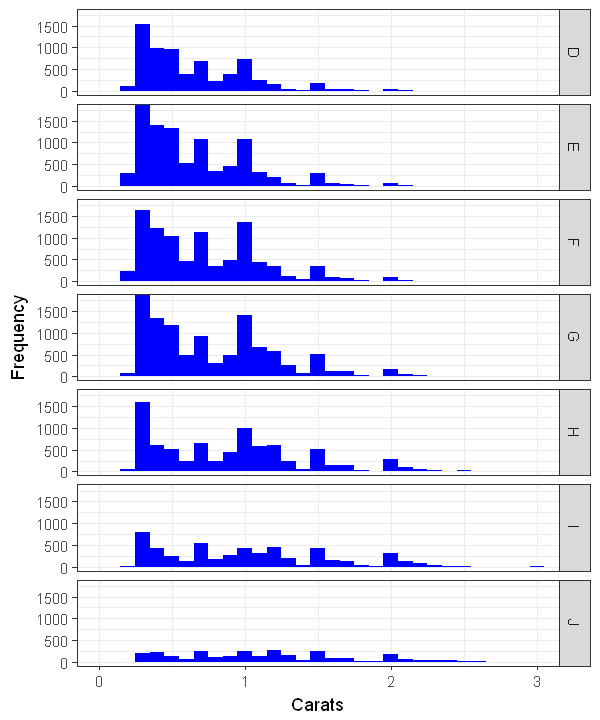

In [31]:
options(repr.plot.width=5, repr.plot.height=6)

ggplot(diamonds, aes(carat)) + 
    geom_histogram(binwidth = 0.1, aes(fill=I("blue"))) + 
    facet_grid(color ~.) + 
    coord_cartesian(xlim = c(0, 3), ylim = c(0, 1800)) + 
    theme_bw() + 
    labs(x="Carats", y="Frequency")

In [32]:
diamonds_small <- diamonds[sample(1:nrow(diamonds), 200, replace=FALSE),]
str(diamonds_small)

Classes 'tbl_df', 'tbl' and 'data.frame':	200 obs. of  10 variables:
 $ carat  : num  0.34 1.54 1.22 2.09 0.39 0.54 1.17 0.66 1.52 0.31 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 4 4 5 4 5 5 2 5 4 4 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 4 2 5 5 4 6 7 2 5 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 4 2 5 2 4 2 3 2 5 3 ...
 $ depth  : num  61.6 59 61.9 62.1 60.7 60.9 63.9 61.9 61.4 62.7 ...
 $ table  : num  58 62 54 58 54 57 55 55 58 58 ...
 $ price  : int  765 8020 8411 17156 745 935 4054 1560 11621 558 ...
 $ x      : num  4.51 7.59 6.88 8.22 4.74 5.26 6.66 5.61 7.44 4.34 ...
 $ y      : num  4.45 7.56 6.9 8.17 4.77 5.31 6.73 5.64 7.3 4.31 ...
 $ z      : num  2.76 4.47 4.26 5.09 2.89 3.22 4.28 3.48 4.55 2.71 ...


Now lets try it with some scatter plots:

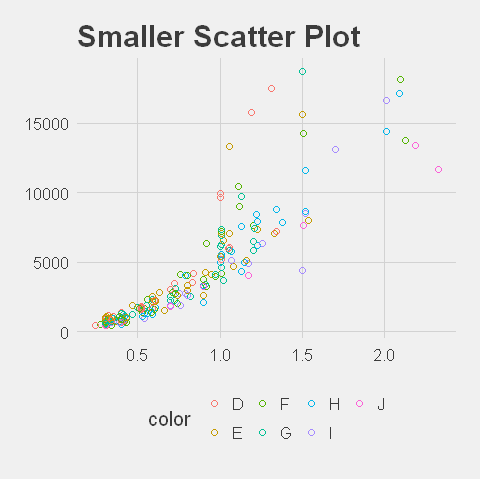

In [33]:
options(repr.plot.width=4, repr.plot.height=4)

g <- ggplot(diamonds_small, aes(x=carat, y=price, color=color)) + 
    geom_point(shape=1) +
    labs(title="Smaller Scatter Plot", x="Carat", y="Price") + 
    theme_fivethirtyeight()
g

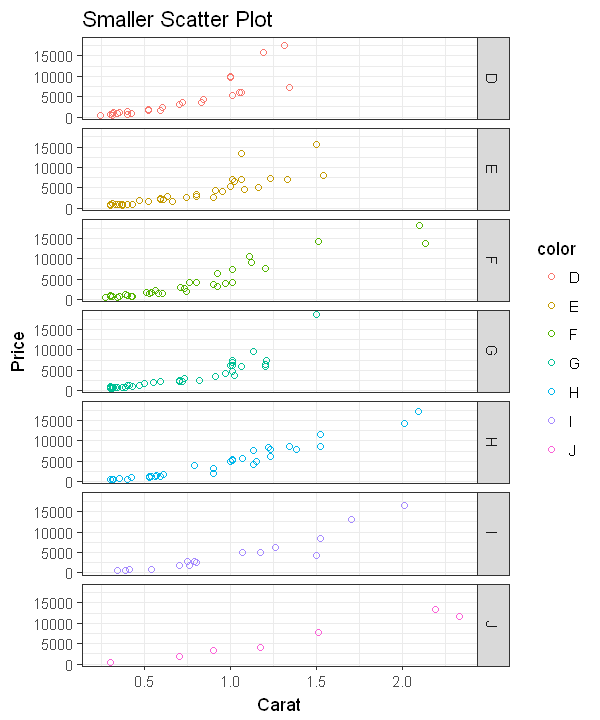

In [34]:
options(repr.plot.width=5, repr.plot.height=6)

# Divide by levels of "color", in the vertical direction
g <- ggplot(diamonds_small, aes(x=carat, y=price, color=color)) + 
    geom_point(shape=1) +
    labs(title="Smaller Scatter Plot", x="Carat", y="Price") + 
    theme_bw() +
    facet_grid(color ~ .)
g

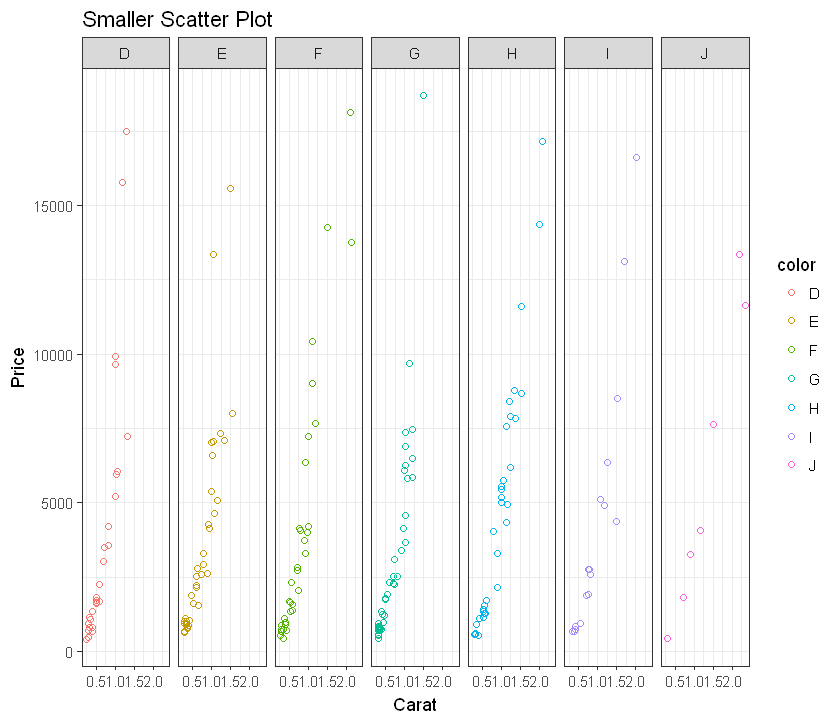

In [35]:
options(repr.plot.width=7, repr.plot.height=6)

# Divide by levels of "color", in the horizontal direction
g <- ggplot(diamonds_small, aes(x=carat, y=price, color=color)) + 
    geom_point(shape=1) +
    labs(title="Smaller Scatter Plot", x="Carat", y="Price") + 
    theme_bw() +
    facet_grid(. ~ color)
g

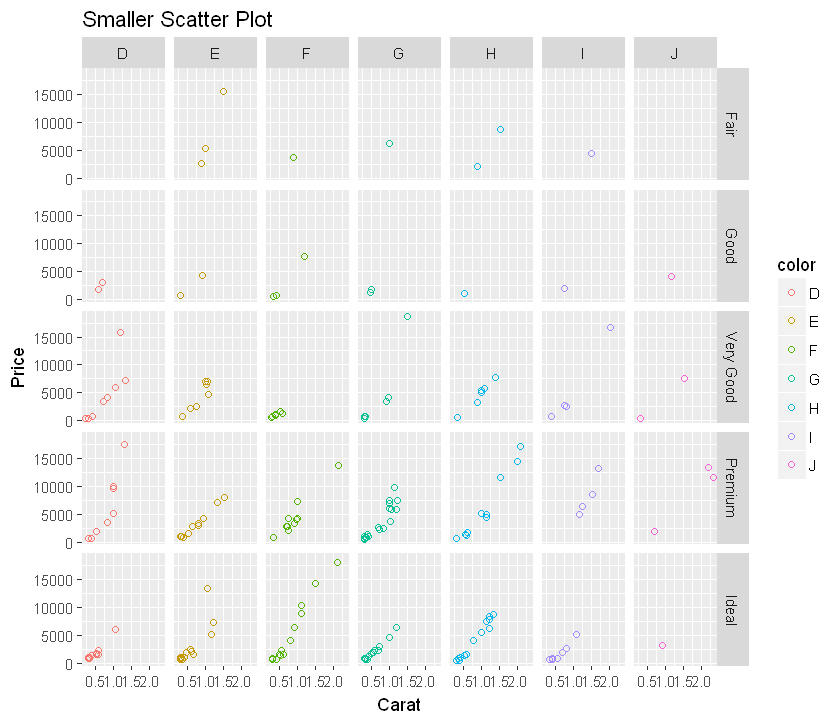

In [36]:
options(repr.plot.width=7, repr.plot.height=6)

# Divide with "cut" vertical, "shape" horizontal
g <- ggplot(diamonds_small, aes(x=carat, y=price, color=color)) + 
    geom_point(shape=1) +
    labs(title="Smaller Scatter Plot", x="Carat", y="Price") + 
    theme_grey() +
    facet_grid(cut ~ color)
g

plotly - Interactive ggplot
--

In R Studio.

Sumário para recapitular:
--

In [ ]:
- ggplot2 baseado na "Gramática de Gráficos"

- str() e head() para inspeccionar base de dados

- os 2 atributos do ggplot2 mais importantes são: Aesthetics e Geoms

- geom_point: Gráfico de Pontos
- geom_smooth: Curva
- geom_boxplot: Gráfico de "Caixas"
- geom_hist e geom_density: Histograma e Densidade
- geom_line: Time Series

- facet_grid: "multigráfico"

- theme_bw/theme_grey/theme_fivethirtyeight

- ggplotly: pacote Plotly para intectividade